In [2]:
import os
import sys
import glob
import pandas as pd
import seaborn as sns
import numpy as  np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from tqdm import tqdm # progress bars :)
tqdm.pandas()

In [3]:
pd.__version__

'0.24.2'

In [4]:
# Import Preprocessed Simulated Read Data

In [5]:
%%bash
mkdir -p ../data
curl -L https://osf.io/f4a9k/download -o ../data/simreads-compare.dnainput.processed.csv.gz
ls ../data

simreads-compare.dnainput.csv.gz
simreads-compare.dnainput.mrcc.csv.gz
simreads-compare.dnainput.processed.csv.gz
simreads-compare.dnainput.processed.mashD.csv.gz


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   459  100   459    0     0    667      0 --:--:-- --:--:-- --:--:--   666
100 8139k  100 8139k    0     0  2543k      0  0:00:03  0:00:03 --:--:-- 5257k


In [6]:
jDF = pd.read_csv("../data/simreads-compare.dnainput.processed.csv.gz")
jDF.head()

,comparison_name,sig1_name,sig2_name,alphabet,ksize,scaled,jaccard,max_containment,sig1_containment,sig2_containment,sig1_hashes,sig2_hashes,num_common,alpha-ksize,num_unique_kmers,true p-distance
0,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1,0.192024,0.329152,0.329152,0.315500,4974666,5189923,1637423,dna-21,5082294.5,0.047855
1,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,100,0.193861,0.332344,0.332344,0.317521,49849,52176,16567,dna-21,5082294.5,0.047855
2,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1000,0.203267,0.343331,0.343331,0.332559,5001,5163,1717,dna-21,5082294.5,0.047855
3,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,2000,0.203029,0.344026,0.344026,0.331274,2494,2590,858,dna-21,5082294.5,0.047855
4,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,31,1,0.108379,0.199794,0.199794,0.191507,4974660,5189923,993907,dna-31,5082291.5,0.047855


In [9]:
# make a "true ANI" column
jDF["true ANI"] = 1 - jDF["true p-distance"]
jDF.head()

,comparison_name,sig1_name,sig2_name,alphabet,ksize,scaled,jaccard,max_containment,sig1_containment,sig2_containment,sig1_hashes,sig2_hashes,num_common,alpha-ksize,num_unique_kmers,true p-distance,true ANI
0,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1,0.192024,0.329152,0.329152,0.315500,4974666,5189923,1637423,dna-21,5082294.5,0.047855,0.952145
1,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,100,0.193861,0.332344,0.332344,0.317521,49849,52176,16567,dna-21,5082294.5,0.047855,0.952145
2,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1000,0.203267,0.343331,0.343331,0.332559,5001,5163,1717,dna-21,5082294.5,0.047855,0.952145
3,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,2000,0.203029,0.344026,0.344026,0.331274,2494,2590,858,dna-21,5082294.5,0.047855,0.952145
4,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,31,1,0.108379,0.199794,0.199794,0.191507,4974660,5189923,993907,dna-31,5082291.5,0.047855,0.952145


In [10]:
jDF.shape

(273600, 17)

In [11]:
# this Dataframe includes 4 scaled values, 3 ksize values == 12 combinations per simulated read pair comparison
jDF[jDF["comparison_name"] == "data-d0.05-f1-nogam-seed36"] #example

,comparison_name,sig1_name,sig2_name,alphabet,ksize,scaled,jaccard,max_containment,sig1_containment,sig2_containment,sig1_hashes,sig2_hashes,num_common,alpha-ksize,num_unique_kmers,true p-distance,true ANI
660,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,21,1,0.190577,0.320984,0.319303,0.320984,4993153,4967010,1594331,dna-21,4980081.5,0.047995,0.952005
661,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,21,100,0.192184,0.322739,0.322739,0.322077,49616,49718,16013,dna-21,4980081.5,0.047995,0.952005
662,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,21,1000,0.197087,0.332343,0.326269,0.332343,5143,5049,1678,dna-21,4980081.5,0.047995,0.952005
663,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,21,2000,0.201250,0.338455,0.331748,0.338455,2523,2473,837,dna-21,4980081.5,0.047995,0.952005
664,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,31,1,0.107025,0.193865,0.192850,0.193865,4993150,4967004,962929,dna-31,4980077.0,0.047995,0.952005
665,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,31,100,0.106976,0.193632,0.192922,0.193632,49932,49749,9633,dna-31,4980077.0,0.047995,0.952005
666,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,31,1000,0.104772,0.192540,0.186888,0.192540,5110,4960,955,dna-31,4980077.0,0.047995,0.952005
667,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,31,2000,0.105969,0.193944,0.189373,0.193944,2503,2444,474,dna-31,4980077.0,0.047995,0.952005
668,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,51,1,0.036558,0.070724,0.070353,0.070724,4993130,4966984,351283,dna-51,4980057.0,0.047995,0.952005
669,data-d0.05-f1-nogam-seed36,data-d0.05-f1-nogam-seed36-seq1,data-d0.05-f1-nogam-seed36-seq2,dna,51,100,0.036894,0.071625,0.070704,0.071625,49997,49354,3535,dna-51,4980057.0,0.047995,0.952005


In [12]:
# there are some comparisons with no k-mers/hashes in common -- let's eliminate these
jDF = jDF[jDF["num_common"] != 0]
jDF.shape

(155143, 17)

In [13]:
cols = ["jaccard", "max_containment", "sig1_containment", "sig2_containment"]
jDF[cols] = jDF[cols].replace(['0', 0], np.nan)#, inplace=True)
jDF.head()

,comparison_name,sig1_name,sig2_name,alphabet,ksize,scaled,jaccard,max_containment,sig1_containment,sig2_containment,sig1_hashes,sig2_hashes,num_common,alpha-ksize,num_unique_kmers,true p-distance,true ANI
0,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1,0.192024,0.329152,0.329152,0.315500,4974666,5189923,1637423,dna-21,5082294.5,0.047855,0.952145
1,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,100,0.193861,0.332344,0.332344,0.317521,49849,52176,16567,dna-21,5082294.5,0.047855,0.952145
2,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1000,0.203267,0.343331,0.343331,0.332559,5001,5163,1717,dna-21,5082294.5,0.047855,0.952145
3,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,2000,0.203029,0.344026,0.344026,0.331274,2494,2590,858,dna-21,5082294.5,0.047855,0.952145
4,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,31,1,0.108379,0.199794,0.199794,0.191507,4974660,5189923,993907,dna-31,5082291.5,0.047855,0.952145


In [14]:
# let's just work with scaled=1 to start:
j1DF = jDF[jDF["scaled"] == 1]
j1DF.shape

(50650, 17)

# Plot Jaccard to true pdistance / ANI

Text(0.5, 1.1, 'Simulated DNA Sequences: Jaccard vs True p-distance')

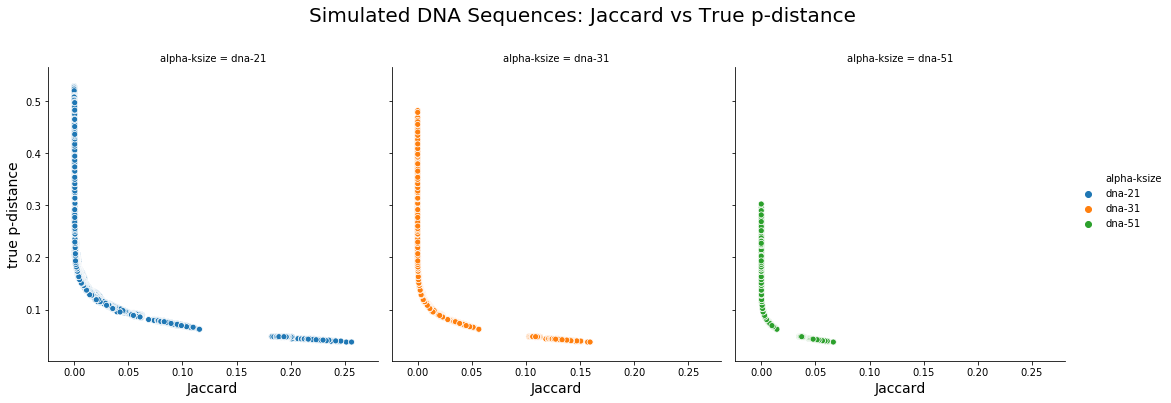

In [15]:
data_to_plot = j1DF # select dataframe to plot with
g = sns.relplot(data=data_to_plot, x="jaccard", y="true p-distance", col="alpha-ksize", hue="alpha-ksize")#, palette="GnBu_d")
for ax in g.fig.axes:
    ax.set_xlabel("Jaccard", size=14)
    ax.set_ylabel("true p-distance", size=14)
g.fig.suptitle("Simulated DNA Sequences: Jaccard vs True p-distance", x=0.5, y=1.10, size=20)

Text(0.5, 1.1, 'Simulated DNA Sequences: Jaccard vs True ANI')

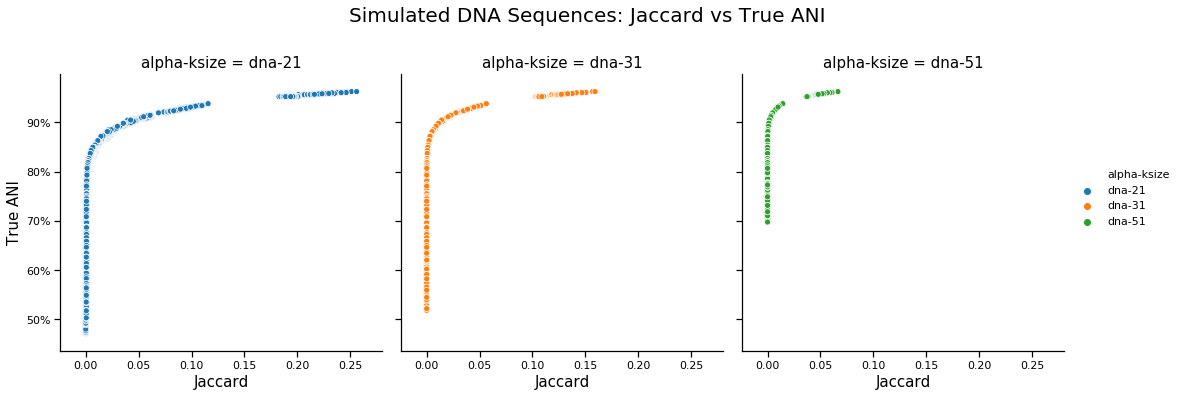

In [16]:
data_to_plot = j1DF # select dataframe to plot with
with sns.plotting_context("notebook", rc={"font.size":12,"axes.titlesize":10,"axes.labelsize":15}):
    g = sns.relplot(data=data_to_plot, x="jaccard", y="true ANI", col="alpha-ksize", hue="alpha-ksize")#, palette="GnBu_d")
    for ax in g.fig.axes:
        ax.set_xlabel("Jaccard")#, size=15)
        ax.set_ylabel("True ANI")#, size=15)
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))

g.fig.suptitle("Simulated DNA Sequences: Jaccard vs True ANI", x=0.5, y=1.10, size=20)

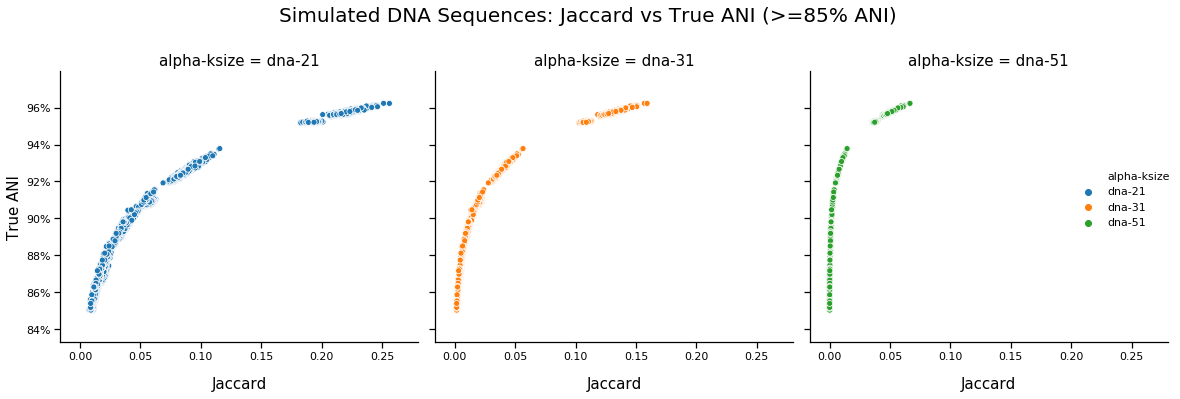

In [18]:
# Zoom in on 0.85 ANI and above and above
aDF = j1DF[j1DF["true ANI"] >= 0.85]

data_to_plot = aDF # select dataframe to plot with
with sns.plotting_context("notebook", rc={"font.size":12,"axes.titlesize":10,"axes.labelsize":15}):
    g = sns.relplot(data=data_to_plot, x="jaccard", y="true ANI", col="alpha-ksize", hue="alpha-ksize")#, palette="GnBu_d")
    for ax in g.fig.axes:
        ax.set_xlabel("Jaccard", labelpad=15)#, size=15)
        ax.set_ylabel("True ANI")#, size=15)
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))

g.fig.suptitle("Simulated DNA Sequences: Jaccard vs True ANI (>=85% ANI)", x=0.5, y=1.10, size=20)
g.fig.tight_layout()

## get a feel for the average ANI at Jaccard = 0.1

In [19]:
# any ksize
j1 = j1DF[(j1DF["jaccard"] >=0.097) & (j1DF["jaccard"] <=0.102)]["true ANI"].mean()
j1

0.93034783935483867

In [20]:
# assess by ksize

k21 = j1DF[j1DF["ksize"] == 21]
k31 = j1DF[j1DF["ksize"] == 31]
k51 = j1DF[j1DF["ksize"] == 51]


In [21]:
k21[(k21["jaccard"] >=0.097) & (k21["jaccard"] <=0.102)]["true ANI"].mean()

0.93034783935483867

In [22]:
k31[(k31["jaccard"] >=0.097) & (k31["jaccard"] <=0.102)]["true ANI"].mean()

nan

In [23]:
k51[(k51["jaccard"] >=0.097) & (k51["jaccard"] <=0.102)]["true ANI"].mean()

nan

In [24]:
## seems like no 0.1 in k31, k51 assessments...